# Loan Eligibility Prediction

The "Loan Eligibility Prediction" project aims to create a robust machine learning model that accurately predicts an applicant's eligibility for a loan based on various features such as income, credit history, and marital status. By utilizing a dataset that contains historical loan application data, the project employs data preprocessing techniques, exploratory data analysis, and classification algorithms—specifically, Naive Bayes and Random Forest classifiers. The goal is to develop a predictive model that helps financial institutions make informed lending decisions while minimizing the risks associated with loan defaults.<br><br>Dataset: [dataset.csv](https://drive.google.com/file/d/1wc1U7_fabihHKWlnXdxGixAcZtqA6lY3/view)<br><br>Check out my projects and resume:<br>Personal Website: [https://nishchal-kansara.web.app/](https://nishchal-kansara.web.app/)<br>Resume: [https://nishchal-kansara.web.app/resume.html](https://nishchal-kansara.web.app/resume.html)

Imports essential libraries for data analysis and visualization:
1. pandas (pd): Used for handling and manipulating data in a tabular format, like DataFrames.
2. numpy (np): Used for numerical operations and working with arrays.
3. matplotlib.pyplot (plt): Used for creating visualizations like graphs and charts.
4. %matplotlib inline: Ensures that plots are displayed within the notebook (specifically for Jupyter/Colab environments).

These imports set up environment for data manipulation and visualization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Here’s what this block of code does:
1. from google.colab import drive: Imports the Google Drive module from Colab, allowing you to access files stored in your Google Drive.
2. drive.mount('/content/drive'): Mounts your Google Drive to Colab, making its contents accessible for reading and writing.
3. path = '/content/drive/MyDrive/Python for Data Science/loan_eligibility_prediction/train_data.csv': Specifies the path to your dataset, stored in Google Drive.
4. ds = pd.read_csv(path): Reads the CSV file at the specified path into a pandas DataFrame called ds, allowing you to work with the data.
5. ds.head(): Displays the first five rows of the dataset to give you a quick preview of its structure.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Python for Data Science/loan_eligibility_prediction/train_data.csv'

ds = pd.read_csv(path)
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Here’s what this block of code does:
1. rows, cols = ds.shape: Retrieves the dimensions of the dataset, where rows stores the number of rows and cols stores the number of columns.
2. print(f"rows={rows} and cols={cols}"): Prints out the number of rows and columns in the dataset using formatted strings for better readability.

This helps you understand the overall size and structure of your dataset.

In [ ]:
rows, cols = ds.shape
print(f"rows={rows} and cols={cols}")

rows=614 and cols=13


ds.info(): Provides a concise summary of the DataFrame ds, including the number of entries (rows), the number of columns, the names of the columns, the data types of each column, and the count of non-null values.

This information is useful for quickly assessing the structure of dataset, checking for missing values, and understanding the types of data you are working with.

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


ds.describe(): Generates descriptive statistics for the numerical columns in the DataFrame ds.

The output includes metrics such as count, mean, standard deviation, minimum, maximum, and quartiles (25th, 50th, and 75th percentiles). This summary provides a quick overview of the distribution and central tendency of the numerical data, helping you identify potential outliers or trends.

In [ ]:
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


pd.crosstab(ds['Credit_History'], ds['Loan_Status'], margins=True): Creates a cross-tabulation (contingency table) of two categorical variables: Credit_History and Loan_Status.
1. It shows the frequency distribution of the loan status (approved or not) based on the credit history (1 for good credit history and 0 for bad credit history).
2. The margins=True parameter adds a row and column at the end of the table that summarizes the totals for each category, making it easier to see overall trends.

This table helps you analyze how credit history impacts loan approval status, providing insights into the relationship between these two variables.

In [ ]:
pd.crosstab(ds['Credit_History'], ds['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


This block of code includes various visualizations related to income and loan amount:

1. This generates box plots and histograms for ApplicantIncome and LoanAmount, allowing for a visual assessment of their distributions, central tendencies, and potential outliers. The box plots reveal income and loan amount variations, while the histograms illustrate frequency distributions across different ranges.
2. A logarithmic transformation is applied to LoanAmount, and its histogram is plotted to help normalize the distribution, making it easier to analyze skewed data.

<Axes: >

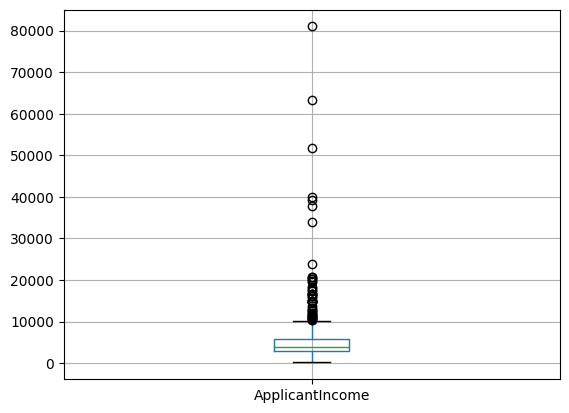

In [ ]:
ds.boxplot(column='ApplicantIncome')

<Axes: >

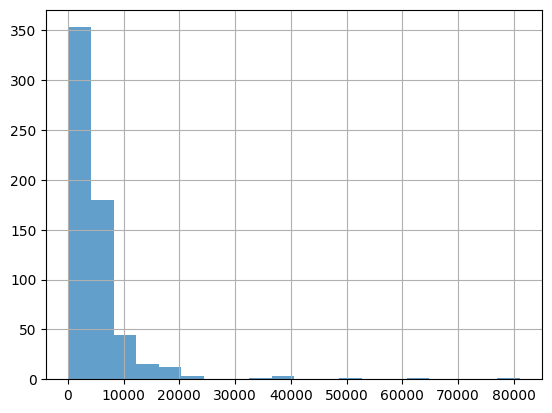

In [ ]:
ds['ApplicantIncome'].hist(bins=20, alpha=0.7)

<Axes: >

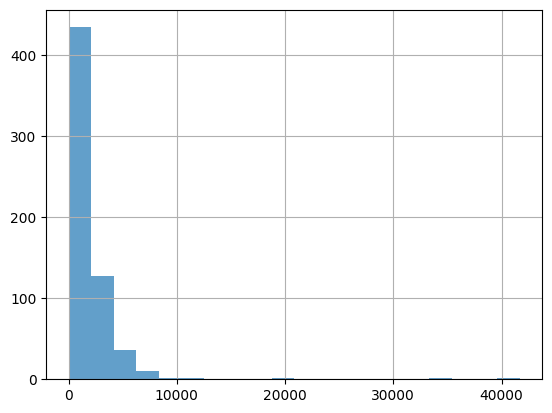

In [ ]:
ds['CoapplicantIncome'].hist(bins=20, alpha=0.7)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

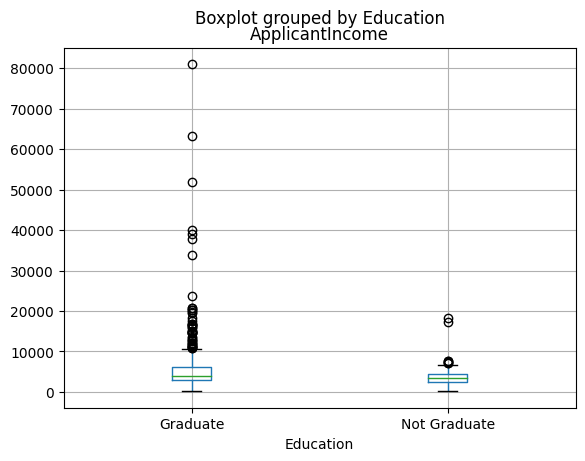

In [ ]:
ds.boxplot(column='ApplicantIncome', by='Education')

<Axes: >

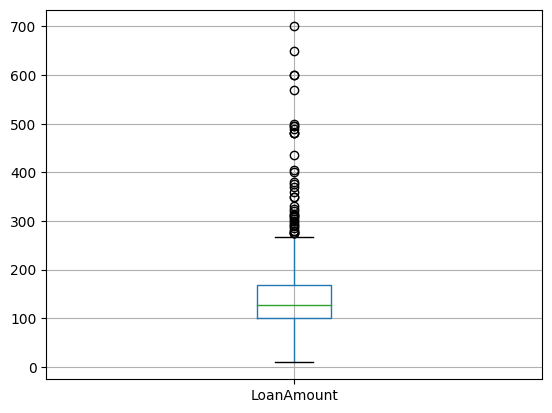

In [ ]:
ds.boxplot(column='LoanAmount')

<Axes: >

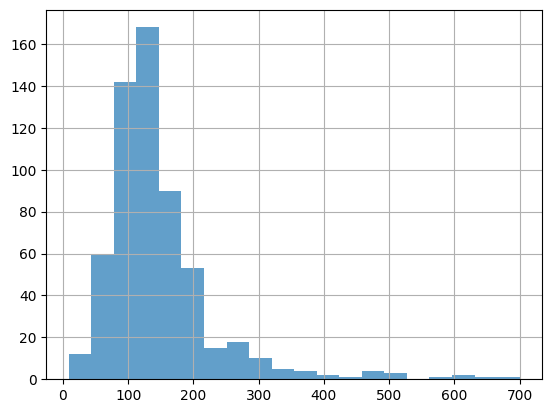

In [ ]:
ds['LoanAmount'].hist(bins=20, alpha=0.7)

<Axes: >

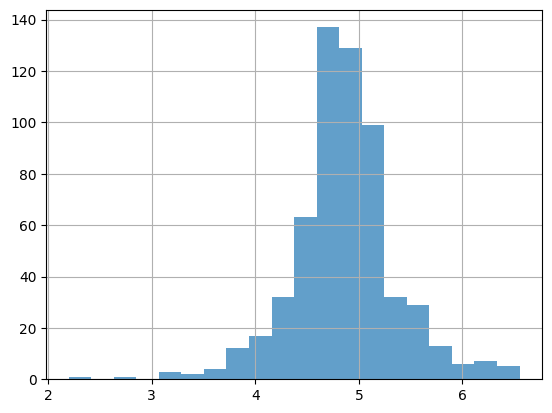

In [ ]:
ds['LoanAmount_log']=np.log(ds['LoanAmount'])
ds['LoanAmount_log'].hist(bins=20, alpha=0.7)

ds.isnull().sum(): Checks for missing values in the DataFrame ds and sums them for each column.

This output provides a count of null values in each column, helping you identify which features have missing data that may need to be addressed before further analysis or modeling.

In [ ]:
ds.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


This code uses fillna() to replace missing values in various columns. For categorical variables (Gender, Married, Dependents, Self_Employed, Loan_Amount_Term, and Credit_History), it fills null values with the mode (most common value) of each respective column, ensuring these features maintain their categorical integrity.

For numerical variables, it replaces missing values in LoanAmount with the mean value and does the same for the log-transformed LoanAmount_log. This approach helps create a complete dataset by ensuring that there are no null entries, which is crucial for accurate analysis and modeling.

In [ ]:
ds['Gender'] = ds['Gender'].fillna(ds['Gender'].mode()[0])
ds['Married'] = ds['Married'].fillna(ds['Married'].mode()[0])
ds['Dependents'] = ds['Dependents'].fillna(ds['Dependents'].mode()[0])
ds['Self_Employed'] = ds['Self_Employed'].fillna(ds['Self_Employed'].mode()[0])
ds.LoanAmount=ds.LoanAmount.fillna(ds.LoanAmount.mean())
ds.LoanAmount_log=ds.LoanAmount_log.fillna(ds.LoanAmount_log.mean())
ds['Loan_Amount_Term'] = ds['Loan_Amount_Term'].fillna(ds['Loan_Amount_Term'].mode()[0])
ds['Credit_History'] = ds['Credit_History'].fillna(ds['Credit_History'].mode()[0])

In [ ]:
ds.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


Here’s what this block of code does:

1. It creates a new column TotalIncome by summing ApplicantIncome and CoapplicantIncome, which gives a comprehensive view of the total income for each applicant.
2. It then calculates the logarithm of TotalIncome and stores it in TotalIncome_log. The histogram of TotalIncome_log is plotted to visualize its distribution, helping to identify trends or patterns in the income data while often normalizing skewed distributions for better analysis.

<Axes: >

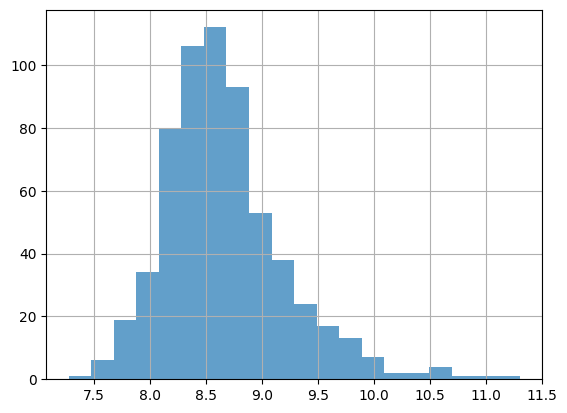

In [ ]:
ds['TotalIncome']=ds['ApplicantIncome']+ds['CoapplicantIncome']
ds['TotalIncome_log']=np.log(ds['TotalIncome'])
ds['TotalIncome_log'].hist(bins=20, alpha=0.7)

In [ ]:
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


Here’s what this block of code does:

1. It extracts feature data into the variable x using iloc, which selects specific columns from the DataFrame ds. It includes columns indexed from 1 to 4, and from 9 to 10, and 13 to 14, gathering the necessary features for modeling.
2. The variable y is assigned the values of the target variable (the column at index 12) using the same iloc method. This setup prepares the data for training a predictive model, with x containing the input features and y representing the corresponding output labels (loan approval status).

In [ ]:
x = ds.iloc[:, np.r_[1:5, 9:11, 13:15]].values
y = ds.iloc[:, 12].values

In [ ]:
x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [ ]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

Here’s what this block of code does:

1. This code imports the train_test_split function from sklearn.model_selection, which is used to divide the dataset into training and testing subsets.
2. It then splits the feature set x and target variable y into training (80%) and testing (20%) sets. The parameters test_size=0.2 specifies the proportion of the dataset to include in the test split, while random_state=0 ensures that the split is reproducible across different runs, providing consistent results for model training and evaluation.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
x_train

array([['Male', 'Yes', '0', ..., 1.0, 4.875197323201151, 5858.0],
       ['Male', 'No', '1', ..., 1.0, 5.278114659230517, 11250.0],
       ['Male', 'Yes', '0', ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       ['Male', 'Yes', '3+', ..., 1.0, 5.298317366548036, 8334.0],
       ['Male', 'Yes', '0', ..., 1.0, 5.075173815233827, 6033.0],
       ['Female', 'Yes', '0', ..., 1.0, 5.204006687076795, 6486.0]],
      dtype=object)

Here’s what this block of code does:

1. This code imports LabelEncoder from sklearn.preprocessing, which is used to convert categorical labels into numerical format for machine learning algorithms.
2. It initializes a LabelEncoder object and applies it to the first five columns of the training feature set x_train (columns indexed 0 to 4). This transformation ensures that categorical variables are represented as integers. Additionally, it specifically encodes the column at index 7 in x_train, preparing the data for model training by converting all relevant categorical features into a numerical format that can be processed by machine learning algorithms.

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x=LabelEncoder()

for i in range(0,5):
  x_train[:,i]=labelencoder_x.fit_transform(x_train[:,i])

x_train[:,7]=labelencoder_x.fit_transform(x_train[:,7])

In [ ]:
x_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

Here’s what this block of code does:
1. This code initializes a LabelEncoder object named labelencoder_y to convert the target variable labels into numerical format.
2. It then applies fit_transform() to the target variable y_train, encoding the loan status (e.g., approved or not) as integers. This transformation allows the model to work with the target variable in a numerical format, which is essential for training most machine learning algorithms.

In [ ]:
labelencoder_y=LabelEncoder()
y_train=labelencoder_y.fit_transform(y_train)

In [ ]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
for i in range(0,5):
  x_test[:,i]=labelencoder_x.fit_transform(x_test[:,i])

x_test[:,7]=labelencoder_x.fit_transform(x_test[:,7])

In [ ]:
labelencoder_y=LabelEncoder()
y_test=labelencoder_y.fit_transform(y_test)

In [ ]:
x_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [ ]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

Here’s what this block of code does:
1. Data Scaling: The code imports StandardScaler from sklearn.preprocessing to standardize the features in x_train and x_test, ensuring they have a mean of 0 and a standard deviation of 1. This scaling is crucial for improving model performance, especially for algorithms sensitive to feature scaling.
2. Model Initialization: It imports RandomForestClassifier from sklearn.ensemble and initializes the classifier as RFClassifier.
3. Model Training: The classifier is trained on the standardized training data (x_train and y_train) using the fit() method, enabling it to learn the patterns in the dataset for predicting loan status.
4. Making Predictions: The trained model predicts loan status for the standardized test set (x_test) using the predict() method, generating the predicted values stored in y_pred.
5. Calculating Accuracy: The code computes the accuracy of the predictions by comparing y_pred with the actual test labels (y_test) using accuracy_score() from sklearn.metrics. It then converts the accuracy into a percentage and prints the result, indicating how well the model performed.

The accuracy calculated refers to the performance of the Random Forest Classifier on the test set, comparing predicted loan statuses (y_pred) with actual statuses (y_test). This score indicates how effectively the model predicts loan eligibility for applicants in the test dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RFClassifier = RandomForestClassifier()
RFClassifier.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=RFClassifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
accuracy = metrics.accuracy_score(y_pred, y_test)
accuracyPct = accuracy * 100
print("Random Forest Classifier Accuracy: {:.2f}%".format(accuracyPct))

Random Forest Classifier Accuracy: 78.86%


Here’s what this block of code does:
1. Model Initialization: The code imports GaussianNB from sklearn.naive_bayes and initializes it as NBClassifier to create a Naive Bayes classifier suitable for Gaussian-distributed data.
2. Model Training: The classifier is trained on the standardized training data (x_train and y_train) using the fit() method, allowing it to learn the patterns for predicting loan eligibility.
3. Making Predictions: It predicts the loan statuses for the test set (x_test) using the predict() method, resulting in the predicted values stored in y_pred.
4. Calculating Accuracy: The accuracy is computed by comparing the predicted values (y_pred) with the actual test labels (y_test) using accuracy_score(). The result is printed as a percentage, indicating the model's effectiveness in predicting loan eligibility.

The accuracy calculated reflects the performance of the Naive Bayes Classifier on the test set, comparing predicted loan statuses (y_pred) with actual loan statuses (y_test). This score indicates how well the model predicts loan eligibility for applicants in the test dataset.

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
NBClassifier=GaussianNB()
NBClassifier.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=NBClassifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
accuracy = metrics.accuracy_score(y_pred, y_test)
accuracyPct = accuracy * 100
print("Naive Bayes Accuracy: {:.2f}%".format(accuracyPct))

Naive Bayes Accuracy: 82.93%


Here’s what this code does:
1. Loading Test Data: The code reads the test dataset from a specified path into a DataFrame td and displays the first few rows for a quick overview.
2. Missing Value Handling: It checks for missing values in td and fills them with the mode for categorical columns (e.g., Gender, Dependents) and the mean for the LoanAmount column to ensure completeness before analysis.
3. Feature Engineering: The code creates new features by calculating the total income from ApplicantIncome and CoapplicantIncome, and applies a logarithmic transformation to both LoanAmount and TotalIncome to normalize their distributions.
4. Data Preparation for Prediction: It selects the relevant features from the test set, encodes categorical variables into numerical format using the previously defined LabelEncoder, and scales the features using StandardScaler for consistent model input.
5. Making Predictions: The Naive Bayes classifier (NBClassifier) predicts loan eligibility for the test data based on the prepared features, storing the results in pred for further analysis.

In [ ]:
path = '/content/drive/MyDrive/Python for Data Science/loan_eligibility_prediction/test_data.csv'

td = pd.read_csv(path)
td.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
td.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
td['Gender'] = td['Gender'].fillna(td['Gender'].mode()[0])
td['Dependents'] = td['Dependents'].fillna(td['Dependents'].mode()[0])
td['Self_Employed'] = td['Self_Employed'].fillna(td['Self_Employed'].mode()[0])
td['Loan_Amount_Term'] = td['Loan_Amount_Term'].fillna(td['Loan_Amount_Term'].mode()[0])
td['Credit_History'] = td['Credit_History'].fillna(td['Credit_History'].mode()[0])

In [ ]:
td.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,0


<Axes: >

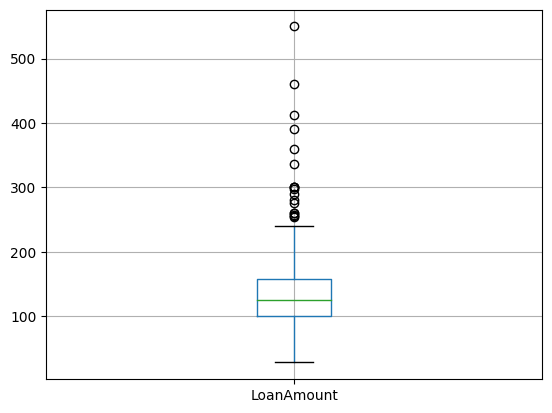

In [ ]:
td.boxplot(column='LoanAmount')

<Axes: >

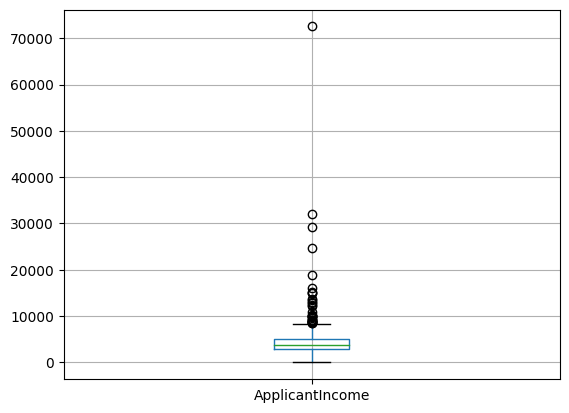

In [ ]:
td.boxplot(column='ApplicantIncome')

In [ ]:
td.LoanAmount=td.LoanAmount.fillna(td.LoanAmount.mean())
td['LoanAmount_log']=np.log(td['LoanAmount'])

In [ ]:
td.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
td['TotalIncome']=td['ApplicantIncome']+td['CoapplicantIncome']
td['TotalIncome_log']=np.log(td['TotalIncome'])

In [ ]:
td.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [ ]:
test = td.iloc[:, np.r_[1:5, 9:11, 13:15]].values

for i in range(0,5):
  test[:,i]=labelencoder_x.fit_transform(test[:,i])

test[:,7]=labelencoder_x.fit_transform(test[:,7])

test

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

In [ ]:
test=s.fit_transform(test)

In [ ]:
pred=NBClassifier.predict(test)
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In conclusion, the "Loan Eligibility Prediction" project demonstrates the effectiveness of machine learning in the financial sector by accurately assessing loan eligibility based on applicant data. Through careful data preprocessing, feature engineering, and model evaluation, the project highlights how advanced algorithms can provide actionable insights for lenders. The successful implementation of this model can lead to improved decision-making processes, ultimately enhancing the efficiency of loan approval systems and fostering better financial outcomes for both lenders and borrowers.